In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
class Company:
    
    risk_free_rate = 0.015
    required_rate_of_return = 0.20
    
    def __init__(self, data):
        self.number_of_projected_years = len(data.axes[1]) - 1
        self.current_assets = data['current_assets']
        self.current_liabilities = data['current_liabilities']
        self.total_liabilities = data['total_liabilities']
        self.equity = data['equity']
        self.eps = data['eps']
        self.share_price = data['share_price']
        self.revenue = data['revenue']
        self.ppe = data['ppe']
        self.operating_cash_flow = data['operating_cash_flow']
        self.current_dividend_per_share = data.loc['2019', 'historical_dividends']
        self.historical_dividends = data['historical_dividends']
        self.lt_debt = data['lt_debt']
        self.current_shares_outstanding = data.loc['2019', 'shares_outstanding']
        

    def get_current_ratio(self):
        return self.current_assets / self.current_liabilities

    def get_debt_to_equity(self):
        return self.total_liabilities / self.equity

    def price_to_eps(self):
        return self.share_price / self.eps    

    def eps_growth(self):
        return float(pd.DataFrame(self.eps).pct_change().mean(skipna = True) * 100)

    def get_avg_revenue_growth(self):
        return float(pd.DataFrame(self.revenue).pct_change().mean(skipna = True) * 100)

    def get_g_m_capex_per_year(self):
        ppe_to_revenue = self.ppe / self.revenue
        revenue_increase = [
            np.nan if i == 0 else self.revenue[i] - self.revenue[i - 1] for i, revenue in  enumerate(self.revenue)
        ]
        gcapex = ppe_to_revenue * revenue_increase
        mcapex = self.ppe - gcapex

        return mcapex

    def get_cash_for_owners(self):
        cash_for_owners = self.operating_cash_flow - self.get_g_m_capex_per_year()

        return cash_for_owners 
        
    def get_avg_owners_cash_growth(self):
        return float(pd.DataFrame(self.get_cash_for_owners()).pct_change().mean(skipna = True) * 100)

    def get_dividend_yield(self):
        return self.current_dividend_per_share / self.share_price * 100

    def get_roic(self):
        print((self.get_cash_for_owners() / (self.lt_debt + self.equity)) * 100)
        return (self.get_cash_for_owners() / (self.lt_debt + self.equity)) * 100

    def get_discounted_cash_flow_valuation(self, growth_rate):
        dcf = []
        for i in range(0, self.number_of_projected_years + 2):
            if i == 0:
                dcf.append(self.get_cash_for_owners()['2019'])
            else:
                dcf.append(dcf[-1] * (1 + growth_rate))
            if i == self.number_of_projected_years + 1:
                dcf.append(dcf[-1] * 10)

        return dcf

    def get_company_intrinsic_value(self, growth_rate):
        return np.npv(self.risk_free_rate, self.get_discounted_cash_flow_valuation(growth_rate))

    def get_company_buy_price(self, growth_rate):
       # print("Company buy price at " + str(self.growth_rate * 100) + "% growth rate:")
        #print(np.npv(self.required_rate_of_return, self.get_discounted_cash_flow_valuation()) / self.current_shares_outstanding)
        return np.npv(self.required_rate_of_return, self.get_discounted_cash_flow_valuation(growth_rate)) / self.current_shares_outstanding

    def get_dividend_discount_model_valuation(self):
        dividend_growth = self.historical_dividends.pct_change().mean()
        print("")
        print("Number of past dividends "+ str(len(self.historical_dividends > 0)))
        return self.current_dividend_per_share / (self.required_rate_of_return - dividend_growth / 100)
    
    def plot_growth_rate_vs_buy_price(self, max_growth_rate, min_growth_rate = 0):
        growth_rate_array = np.linspace(min_growth_rate, max_growth_rate, 100)
        buy_price_array = [self.get_company_buy_price(growth_rate) for growth_rate in growth_rate_array]
        plt.plot(growth_rate_array, buy_price_array)
        plt.xlabel('Growth Rate')
        plt.ylabel('Buy Price ($)')


In [ ]:
ctd_data = pd.read_csv('ctd.csv', index_col=0)

ctd_data = ctd_data.transpose()

CTD = Company(ctd_data)

print(CTD.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
CTD.get_avg_revenue_growth(),
"\ncash for owners\n",
CTD.get_cash_for_owners(),
"\nAVG cash growth\n",
CTD.get_avg_owners_cash_growth(),
"\nROIC\n",
CTD.get_roic(),
"\nP/E\n",
CTD.price_to_eps(),
"\neps growth\n",
CTD.eps_growth(),
"\ndebt to equity\n",
CTD.get_debt_to_equity())

2009          NaN
2010    12.080537
2011    -4.864865
2012    17.052336
2013    -6.024096
2014    -0.917275
2015     2.660959
2016     0.500132
2017    -0.377616
2018    -2.201388
2019     6.139247
dtype: float64
None 
AVG revenue growth
 15.091758358821814 
cash for owners
 2009          NaN
2010    18.000000
2011    -9.000000
2012    32.228916
2013   -15.000000
2014    -2.779343
2015     7.796610
2016     1.965517
2017    -1.574661
2018   -10.698745
2019    30.450667
dtype: float64 
AVG cash growth
 -141.85819899543023 
ROIC
 2009          NaN
2010    12.080537
2011    -4.864865
2012    17.052336
2013    -6.024096
2014    -0.917275
2015     2.660959
2016     0.500132
2017    -0.377616
2018    -2.201388
2019     6.139247
dtype: float64 
P/E
 2009          NaN
2010          NaN
2011     8.847826
2012     6.886792
2013    10.300000
2014    13.444444
2015     9.907407
2016     7.818182
2017     9.122807
2018    10.722222
2019     9.344262
dtype: float64 
eps growth
 9.929524906385701 
de

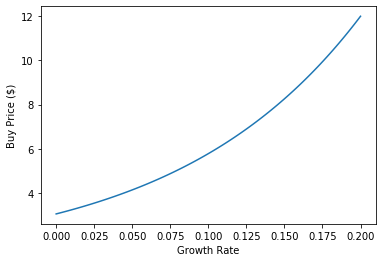

In [60]:
cwp_data = pd.read_csv('cwp_test.csv', index_col=0)

cwp_data = cwp_data.transpose()

CWP = Company(cwp_data)

print(CWP.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
CWP.get_avg_revenue_growth(),
"\ncash for owners\n",
CWP.get_cash_for_owners(),
"\nAVG cash growth\n",
CWP.get_avg_owners_cash_growth(),
"\nROIC\n",
CWP.get_roic(),
"\nP/E\n",
CWP.price_to_eps(),
"\neps growth\n",
CWP.eps_growth(),
"\ndebt to equity\n",
CWP.get_debt_to_equity())

2009          NaN
2010     6.644958
2011    18.290387
2012    11.107922
2013    14.761954
2014    10.945120
2015     3.520910
2016     8.372832
2017    13.058550
2018    13.076827
2019    14.965672
dtype: float64
None 
AVG revenue growth
 12.27937671546971 
cash for owners
 2009          NaN
2010    15.815000
2011    43.531120
2012    28.769517
2013    42.809668
2014    36.994505
2015    12.147139
2016    27.965261
2017    41.526190
2018    55.184211
2019    66.896552
dtype: float64 
AVG cash growth
 38.02469787894032 
ROIC
 2009          NaN
2010     6.644958
2011    18.290387
2012    11.107922
2013    14.761954
2014    10.945120
2015     3.520910
2016     8.372832
2017    13.058550
2018    13.076827
2019    14.965672
dtype: float64 
P/E
 2009          NaN
2010          inf
2011     8.466667
2012    11.769231
2013    17.333333
2014    10.263158
2015    15.777778
2016    11.466667
2017    12.588235
2018    11.952381
2019    12.173913
dtype: float64 
eps growth
 inf 
debt to equity
 200

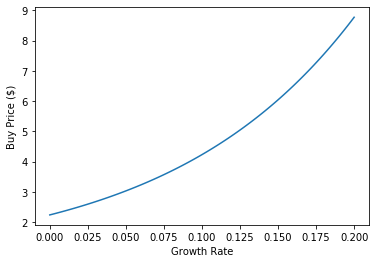

In [61]:
kmd_data = pd.read_csv('kmd_test.csv', index_col=0)

kmd_data = kmd_data.transpose()

KMD = Company(kmd_data)

print(KMD.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
KMD.get_avg_revenue_growth(),
"\ncash for owners\n",
KMD.get_cash_for_owners(),
"\nAVG cash growth\n",
KMD.get_avg_owners_cash_growth(),
"\nROIC\n",
KMD.get_roic(),
"\nP/E\n",
KMD.price_to_eps(),
"\neps growth\n",
KMD.eps_growth(),
"\ndebt to equity\n",
KMD.get_debt_to_equity())

2010          NaN
2011    -2.265543
2012    -8.791209
2013     0.000000
2014     6.652661
2015    10.018679
2016    -8.539144
2017     8.507800
2018     7.912879
2019     1.001351
dtype: float64
None 
AVG revenue growth
 24.542254006768072 
cash for owners
 2010          NaN
2011    -1.653846
2012    -8.000000
2013     0.000000
2014     8.382353
2015    15.128205
2016   -15.114286
2017    17.270833
2018    19.386555
2019     3.554795
dtype: float64 
AVG cash growth
 inf 
ROIC
 2010          NaN
2011    -2.265543
2012    -8.791209
2013     0.000000
2014     6.652661
2015    10.018679
2016    -8.539144
2017     8.507800
2018     7.912879
2019     1.001351
dtype: float64 
P/E
 2010     30.363636
2011     59.785714
2012     77.416667
2013    172.000000
2014     98.833333
2015     69.812500
2016     72.111111
2017     38.814815
2018     35.100000
2019     28.962264
dtype: float64 
eps growth
 24.074688685799803 
debt to equity
 2010    1.222222
2011    1.583333
2012    1.625000
2013    0.69

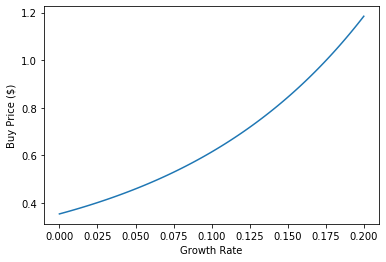

In [5]:
lic_data = pd.read_csv('lic.csv', index_col=0)

lic_data = lic_data.transpose()

LIC = Company(lic_data)

print(LIC.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
LIC.get_avg_revenue_growth(),
"\ncash for owners\n",
LIC.get_cash_for_owners(),
"\nAVG cash growth\n",
LIC.get_avg_owners_cash_growth(),
"\nROIC\n",
LIC.get_roic(),
"\nP/E\n",
LIC.price_to_eps(),
"\neps growth\n",
LIC.eps_growth(),
"\ndebt to equity\n",
LIC.get_debt_to_equity())


In [ ]:
rhc_data = pd.read_csv('rhc.csv', index_col=0)

rhc_data = rhc_data.transpose()

rhc = Company(rhc_data)

print(rhc.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
rhc.get_avg_revenue_growth(),
"\ncash for owners\n",
rhc.get_cash_for_owners(),
"\nAVG cash growth\n",
rhc.get_avg_owners_cash_growth(),
"\nROIC\n",
rhc.get_roic(),
"\nP/E\n",
rhc.price_to_eps(),
"\neps growth\n",
rhc.eps_growth(),
"\ndebt to equity\n",
rhc.get_debt_to_equity())

2014          NaN
2015    17.792502
2016    12.896406
2017    19.942197
2018    15.652174
2019    30.276558
dtype: float64
None 
AVG revenue growth
 29.302320071569532 
cash for owners
 2014           NaN
2015     24.197802
2016     44.363636
2017     69.000000
2018     54.000000
2019    102.032000
dtype: float64 
AVG cash growth
 51.51981660254692 
ROIC
 2014          NaN
2015    17.792502
2016    12.896406
2017    19.942197
2018    15.652174
2019    30.276558
dtype: float64 
P/E
 2014          NaN
2015     7.800000
2016    15.172414
2017    19.705882
2018    25.413043
2019    12.416667
dtype: float64 
eps growth
 25.470830761090035 
debt to equity
 2014         NaN
2015    1.024096
2016    1.257732
2017    1.263415
2018    0.589041
2019    0.711191
dtype: float64


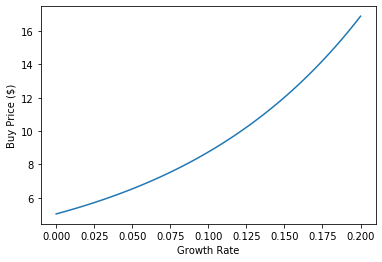

In [6]:
siq_data = pd.read_csv('siq.csv', index_col=0)

siq_data = siq_data.transpose()

SIQ = Company(siq_data)

print(SIQ.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
SIQ.get_avg_revenue_growth(),
"\ncash for owners\n",
SIQ.get_cash_for_owners(),
"\nAVG cash growth\n",
SIQ.get_avg_owners_cash_growth(),
"\nROIC\n",
SIQ.get_roic(),
"\nP/E\n",
SIQ.price_to_eps(),
"\neps growth\n",
SIQ.eps_growth(),
"\ndebt to equity\n",
SIQ.get_debt_to_equity())

2010         NaN
2011    8.860417
2012    4.032662
2013    5.774584
2014    3.020260
2015    2.637119
2016   -0.918744
2017    2.746743
2018    4.508395
2019    4.885526
dtype: float64
None 
AVG revenue growth
 11.260769772514024 
cash for owners
 2010          NaN
2011    48.820896
2012    22.502254
2013    33.608076
2014    19.480675
2015    17.563211
2016    -6.458771
2017    22.248619
2018    40.710811
2019    47.047619
dtype: float64 
AVG cash growth
 -67.39150316180688 
ROIC
 2010         NaN
2011    8.860417
2012    4.032662
2013    5.774584
2014    3.020260
2015    2.637119
2016   -0.918744
2017    2.746743
2018    4.508395
2019    4.885526
dtype: float64 
P/E
 2010    25.119403
2011    21.025000
2012    21.420455
2013    26.260000
2014    33.327434
2015    34.463415
2016    30.817518
2017    35.257669
2018    33.978261
2019    31.363636
dtype: float64 
eps growth
 14.188641690906673 
debt to equity
 2010    0.565012
2011    0.406814
2012    0.493952
2013    0.491525
2014    0.

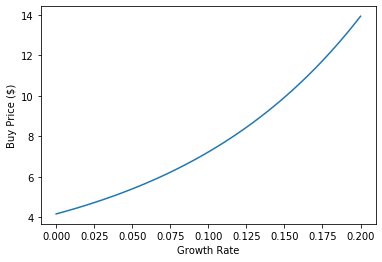

In [5]:
txrh_data = pd.read_csv('txrh.csv', index_col=0)

txrh_data = txrh_data.transpose()

TXRH = Company(txrh_data)
print(TXRH.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
TXRH.get_avg_revenue_growth(),
"\ncash for owners\n",
TXRH.get_cash_for_owners(),
"\nAVG cash growth\n",
TXRH.get_avg_owners_cash_growth(),
"\nROIC\n",
TXRH.get_roic(),
"\nP/E\n",
TXRH.price_to_eps(),
"\neps growth\n",
TXRH.eps_growth(),
"\ndebt to equity\n",
TXRH.get_debt_to_equity())


2009          NaN
2010    -2.051282
2011    11.750000
2012    11.851852
2013    10.044978
2014     6.739812
2015     9.841270
2016    -9.677419
2017    -5.965909
2018    -2.525253
2019     8.812261
dtype: float64

revenue growth 7.310960863518409 
cash for owners 2009         NaN
2010   -0.307692
2011    2.350000
2012    3.200000
2013    2.913043
2014    1.954545
2015    2.952381
2016   -3.000000
2017   -1.909091
2018   -0.833333
2019    3.172414
dtype: float64 
ROIC 2009          NaN
2010    -2.051282
2011    11.750000
2012    11.851852
2013    10.044978
2014     6.739812
2015     9.841270
2016    -9.677419
2017    -5.965909
2018    -2.525253
2019     8.812261
dtype: float64 
g m capex
 2009         NaN
2010    1.307692
2011    0.650000
2012    0.800000
2013    1.086957
2014    1.045455
2015    1.047619
2016    3.000000
2017    1.909091
2018    1.833333
2019    0.827586
dtype: float64 
pe
 2009          NaN
2010          inf
2011     9.000000
2012    12.000000
2013     9.000000
2014  

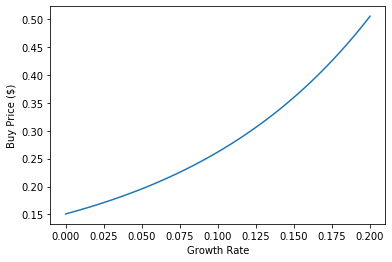

In [5]:
xrf_data = pd.read_csv('xrf.csv', index_col=0)

xrf_data = xrf_data.transpose()

xrf = Company(xrf_data)
print("\nrevenue growth", xrf.get_avg_revenue_growth(), "\ncash for owners",
xrf.get_cash_for_owners(),"\nROIC",
xrf.get_roic(), "\ng m capex\n",xrf.get_g_m_capex_per_year(),
"\npe\n", xrf.price_to_eps())
xrf.plot_growth_rate_vs_buy_price(.20)

2014          NaN
2015    17.792502
2016    12.896406
2017    19.942197
2018    15.652174
2019    30.276558
dtype: float64
None 
AVG revenue growth
 29.302320071569532 
cash for owners
 2014           NaN
2015     24.197802
2016     44.363636
2017     69.000000
2018     54.000000
2019    102.032000
dtype: float64 
AVG cash growth
 51.51981660254692 
ROIC
 2014          NaN
2015    17.792502
2016    12.896406
2017    19.942197
2018    15.652174
2019    30.276558
dtype: float64 
P/E
 2014          NaN
2015     7.800000
2016    15.172414
2017    19.705882
2018    25.413043
2019    12.416667
dtype: float64 
eps growth
 25.470830761090035 
debt to equity
 2014         NaN
2015    1.024096
2016    1.257732
2017    1.263415
2018    0.589041
2019    0.711191
dtype: float64


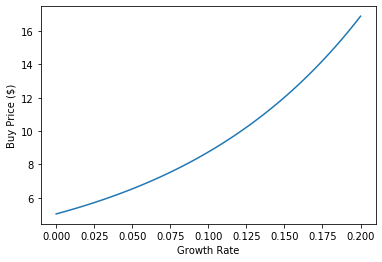

In [4]:
siq_data = pd.read_csv('siq.csv', index_col=0)

siq_data = siq_data.transpose()

SIQ = Company(siq_data)

print(SIQ.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
SIQ.get_avg_revenue_growth(),
"\ncash for owners\n",
SIQ.get_cash_for_owners(),
"\nAVG cash growth\n",
SIQ.get_avg_owners_cash_growth(),
"\nROIC\n",
SIQ.get_roic(),
"\nP/E\n",
SIQ.price_to_eps(),
"\neps growth\n",
SIQ.eps_growth(),
"\ndebt to equity\n",
SIQ.get_debt_to_equity())

2009          NaN
2010     6.758948
2011     9.349208
2012     9.270196
2013     7.147184
2014    11.548199
2015     9.685833
2016     9.142677
2017     8.330746
2018     8.986360
2019     5.242796
dtype: float64
None 
AVG revenue growth
 14.349269772895715 
cash for owners
 2009           NaN
2010    169.987552
2011    234.571622
2012    224.802245
2013    197.834059
2014    353.836830
2015    420.074590
2016    473.316374
2017    452.942656
2018    545.382182
2019    431.586989
dtype: float64 
AVG cash growth
 14.146755884682676 
ROIC
 2009          NaN
2010     6.758948
2011     9.349208
2012     9.270196
2013     7.147184
2014    11.548199
2015     9.685833
2016     9.142677
2017     8.330746
2018     8.986360
2019     5.242796
dtype: float64 
P/E
 2009          NaN
2010    25.188406
2011    20.177778
2012    27.303571
2013    39.491935
2014    44.615385
2015    33.858696
2016    32.412037
2017    28.634043
2018    32.618280
2019    29.460076
dtype: float64 
eps growth
 17.36908981

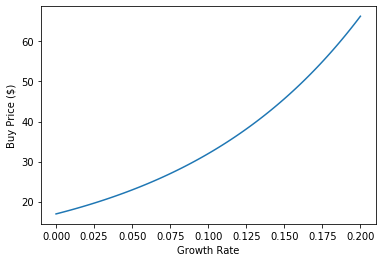

In [56]:
rhc_data = pd.read_csv('rhc.csv', index_col=0)

rhc_data = rhc_data.transpose()

rhc = Company(rhc_data)

print(rhc.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
rhc.get_avg_revenue_growth(),
"\ncash for owners\n",
rhc.get_cash_for_owners(),
"\nAVG cash growth\n",
rhc.get_avg_owners_cash_growth(),
"\nROIC\n",
rhc.get_roic(),
"\nP/E\n",
rhc.price_to_eps(),
"\neps growth\n",
rhc.eps_growth(),
"\ndebt to equity\n",
rhc.get_debt_to_equity())

2009         NaN
2010   -4.981366
2011    0.511088
2012    7.343172
2013    8.866096
2014    5.533431
2015    2.697212
2016   -4.065257
2017    0.724525
2018   -2.640522
2019   -0.637938
dtype: float64

Number of past dividends 11
None 
AVG revenue growth
 11.19489360192718 
cash for owners
 2009          NaN
2010   -13.947826
2011     1.594595
2012    24.085603
2013    30.676692
2014    20.307692
2015    11.355263
2016   -20.814118
2017     4.202247
2018   -17.533066
2019    -5.090744
dtype: float64 
AVG cash growth
 28.535179575917258 
ROIC
 2009         NaN
2010   -4.981366
2011    0.511088
2012    7.343172
2013    8.866096
2014    5.533431
2015    2.697212
2016   -4.065257
2017    0.724525
2018   -2.640522
2019   -0.637938
dtype: float64 
P/E
 2009          NaN
2010     7.100000
2011     6.619048
2012     6.789474
2013    10.478261
2014    13.714286
2015    10.588235
2016    12.303030
2017    10.459459
2018    12.757576
2019    11.333333
dtype: float64 
eps growth
 6.45174986203388

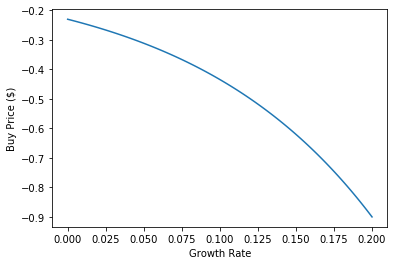

In [66]:
tgr_data = pd.read_csv('tgr.csv', index_col=0)

tgr_data = tgr_data.transpose()

tgr = Company(tgr_data)

print(tgr.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
tgr.get_avg_revenue_growth(),
"\ncash for owners\n",
tgr.get_cash_for_owners(),
"\nAVG cash growth\n",
tgr.get_avg_owners_cash_growth(),
"\nROIC\n",
tgr.get_roic(),
"\nP/E\n",
tgr.price_to_eps(),
"\neps growth\n",
tgr.eps_growth(),
"\ndebt to equity\n",
tgr.get_debt_to_equity(),
"\ndividend discount model\n",
tgr.get_dividend_discount_model_valuation())
